In [115]:
# 순환신경망 RNN [i am a boy]

In [116]:
# 순환 고리는 다음에 들어온 데이터를 처리할때 재사용 (순서가 중요한 데이터에 사용?)

# 가중치가 2개 _> 순환용 가중치 따로

In [117]:
# 자연어 처리, NLP
# cf. corpus 말뭉치

## IMDB 데이터셋 (영화 리뷰의 긍부정 여부를 0과 1로 표시)

In [118]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words=300)

In [119]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [120]:
print(train_target[0])

1


In [121]:
train_target[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [122]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2)

In [123]:
#length histogram으로 확인

In [124]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [125]:
train_seq.shape

(20000, 100)

In [126]:
train_seq[0]

array([260,  27, 205,   2,   2,   2,   4, 172, 284,   2,   2,   2, 199,
         2,   5,   2,   2,  14,   2,   9,   2,  30,   6,   2,  10,  10,
         2,  23,   4,   2,   9,   6,   2,  11, 175,   2,  11,   2,   5,
         2,  11,   2,   5,   2,   6,   2,  11,   4,   2,   7,  14,   2,
       167,  49, 135,  15,  14,   9,  27, 118,  22,  11,  61,   2,   2,
         2,  32,  15,   2,   2, 225, 210,   2,   5,   2,   7,   2,  26,
        43,  17,  52,   5,  18, 148,  37, 276,   2,  11,   4,   2,   7,
         2,  42,   2,  13,   2,  98,  57,   2, 130])

In [127]:
train_input[0][-10:]

[7, 2, 42, 2, 13, 2, 98, 57, 2, 130]

In [128]:
train_seq[7]

array([  8,   2,   2,  15,   2,  30,   2, 195,  19,   4,   2,   5, 145,
         8,   4,  20,   4,   2,   9,   2,   2,  33,   2,   5,   2,   2,
        33,   2,  12,   2,   2,  17,   6,   2,   2,   2,   8,   2,   4,
       178,   2,   5,   2,   7,   4,   2,   2,  48,  25, 104,   4,   2,
         9,   2,  11,   2,   7,   2,   2,   2,  25,  39,   2, 129,   2,
        31,   2,   2,   7,   4,  22,   9,   2,   2,   2,  17,  16,   2,
         2,  34,   4,   2,   2, 112,   2,   2,  23,   2,   2,   2,   2,
       298,   2,   2,   8,   2,   2,   2,   2,   2])

In [129]:
val_seq = pad_sequences(val_input, maxlen=100)

In [130]:
model = keras.Sequential()

In [131]:
#100은 우리가 가지고 있는ㄷ ㅔ이터 길이 / 300은 어휘 사전의 갯수
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [132]:
train_oh = keras.utils.to_categorical(train_seq)

In [133]:
train_oh.shape

(20000, 100, 300)

In [134]:
#train_oh[0][0][:]

In [135]:
val_oh = keras.utils.to_categorical(val_seq)

In [136]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)            │ (None, 8)                  │           2,472 │
├─────────────────────────────────────┼────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                     │ (None, 1)                  │               9 │
└─────────────────────────────────────┴────────────────────────────┴─────────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

cp_cb = keras.callbacks.ModelCheckpoint('best_rnn.keras', save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_oh,
    train_target,
    epochs = 100,
    batch_size=64,
    validation_data=(val_oh, val_target),
    callbacks=[cp_cb, es_cb]
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7679 - loss: 0.5002 - val_accuracy: 0.7448 - val_loss: 0.5229
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7655 - loss: 0.5052 - val_accuracy: 0.7464 - val_loss: 0.5231
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7623 - loss: 0.5076 - val_accuracy: 0.7488 - val_loss: 0.5195
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7665 - loss: 0.5000 - val_accuracy: 0.7490 - val_loss: 0.5204
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7718 - loss: 0.4939 - val_accuracy: 0.7458 - val_loss: 0.5227
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7711 - loss: 0.4965 - val_accuracy: 0.7474 - val_loss: 0.5226


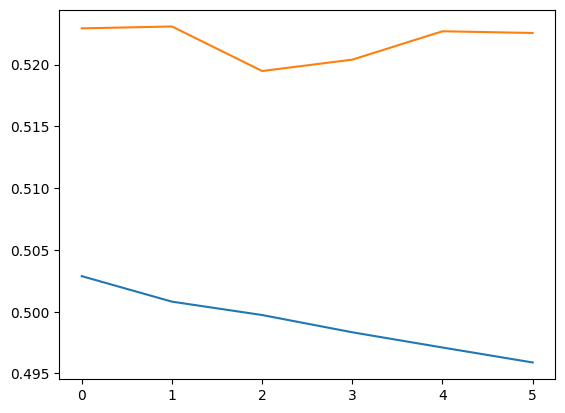

In [143]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
# 어떠한 단어를 어떤 특정한 임베딩 위에 올려놓는다?

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

In [145]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

cp_cb = keras.callbacks.ModelCheckpoint('best_rnn_emb.keras', save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(
    train_seq,
    train_target,
    epochs = 100,
    batch_size=64,
    validation_data=(val_seq, val_target),
    callbacks=[cp_cb, es_cb]
)

Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node sequential_3_1/simple_rnn_3_1/while/TensorListPushBack_5 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\2-13\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "C:\Users\2-13\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "C:\Users\2-13\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\2-13\AppData\Local\Temp\ipykernel_19888\2523152835.py", line 11, in <module>

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 318, in fit

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 70, in train_step

  File "C:\Users\2-13\Desktop\DMF\ML\venv\Lib\site-packages\tensorflow\core\function\capture\capture_container.py", line 154, in capture_by_value

Tried to append a tensor with incompatible shape to a list. Op element shape: [0] list shape: [16,8]
	 [[{{node sequential_3_1/simple_rnn_3_1/while/TensorListPushBack_5}}]] [Op:__inference_one_step_on_iterator_87380]